Elimizde odaya yerleştirilen 5 adet sensör ile toplanan veriler(Temperature, Humidity, Light, CO2, HumidityRatio) ile
oluşturulan 3 adet veri seti mevcut.

İlk 2 veri seti odanın kapısı kapalıyken alınan ölçümleri, 3. veriseti ise odanın kapısı açıkken alınan ölçümleri içermekte.

Amacımız, elimizdeki ilk 2 veri setini(kapılar kapalı) kullanarak, 3. veriseti üzerinde ortamdaki insan varlığını tahmin etmek.

In [18]:
# İhtiyacımız olan kütüphaneleri import ettik.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics


# Veri setlerini teker teker okuduk.

ds_1=pd.read_csv("Veriseti1.csv") # KAPILAR KAPALIYKEN ALINAN ÖLÇÜM DEĞERLERİ
ds_2=pd.read_csv("Veriseti2.csv") # KAPILAR KAPALIYKEN ALINAN ÖLÇÜM DEĞERLERİ
ds_3=pd.read_csv("Veriseti3.csv") # KAPILAR AÇIKKEN ALINAN ÖLÇÜM DEĞERLERİ

# içerisinde sayısal olmayan değerler ve eksik değerler var mı kontrol ettik.

ds_3.info();
ds_2.info();
ds_1.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 140 to 2804
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio

In [2]:
# Modeli eğitirken  1. ve 2. verisetini birlikte kullanabilmek için ikisini ds_concat adı altında birleştirdik.
ds_concat=pd.concat([ds_1,ds_2])

In [3]:
# ilk 5 değeri yazdırdık
ds_concat.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [4]:
# ilk 5 değeri yazdırdık
ds_3.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [5]:
# Verisetine ait istatistiksel değerleri görüntüledik.
ds_concat.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,10808.000000,10808.000000,10808.000000,10808.00000,10808.000000,10808.000000
mean,20.819992,25.638407,137.694088,634.00507,0.003903,0.249907
std,1.078410,4.953792,212.175483,312.81727,0.000803,0.432979
min,19.000000,16.745000,0.000000,412.75000,0.002674,0.000000
25%,20.000000,21.390000,0.000000,441.00000,0.003323,0.000000
50%,20.700000,25.680000,0.000000,464.00000,0.003805,0.000000
75%,21.500000,28.324167,413.541667,761.00000,0.004372,0.000000
max,24.408333,39.117500,1697.250000,2028.50000,0.006476,1.000000


In [6]:
# Verisetine ait istatistiksel değerleri görüntüledik.
ds_3.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [7]:
# Veri setinde bulunan parametrelerin Occupancy parametresi ile olan korelasyonunu inceledik.
ds_concat.corrwith(ds_concat["Occupancy"]).sort_values(ascending=False)

Occupancy        1.000000
Light            0.915363
CO2              0.729540
Temperature      0.595005
HumidityRatio    0.386346
Humidity         0.183020
dtype: float64

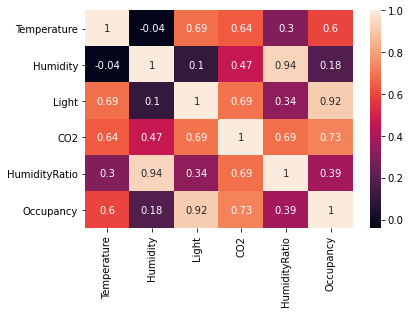

In [8]:
# Heatmap ile parametrelerin birbirleri ile olan ilişkilerini gösterdik
corr_mat=ds_concat.corr()
sns.heatmap(corr_mat, annot=True)
plt.show()

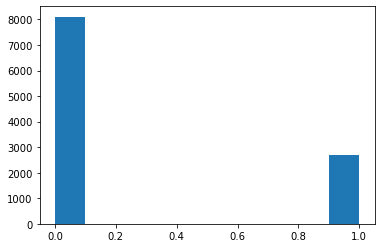

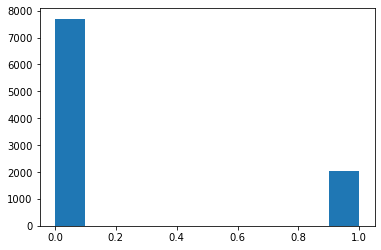

In [9]:
# Birleştirilen veri seti ve veri seti 3'te bulunan Occupancy parametresinin dağılımlarını inceledim.

plt.hist(ds_concat["Occupancy"]);
plt.show()
plt.hist(ds_3["Occupancy"]);


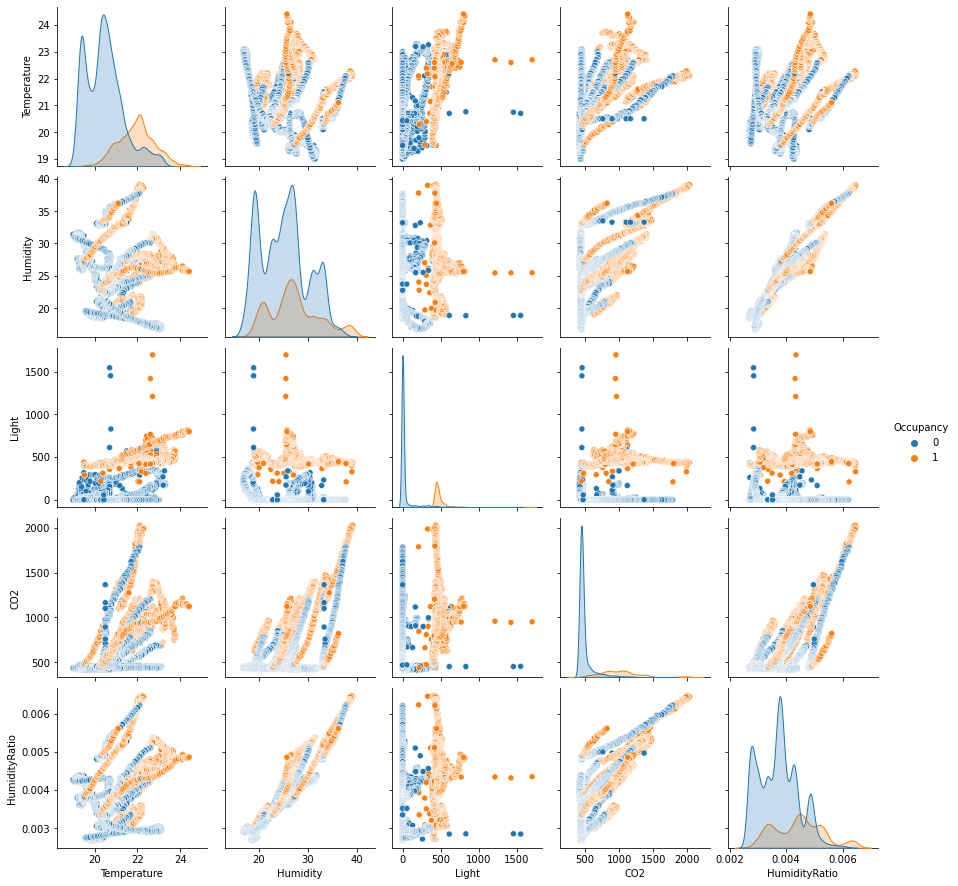

In [10]:
# Pairplot ile parametrelerin birbirleri ile olan ilişkilerini grafik haline getirdik.
sns.pairplot(ds_concat, hue="Occupancy")

In [11]:
# İhtiyacımız olan parametreleri features içerisine yazdık. Hedef parametre Occupancy olduğu için onu yazmadık.

features=["Temperature","Humidity","CO2","HumidityRatio","Light"]

# Logistic Regression

In [43]:
# Hedef parametremiz Occupancy. Modeli eğitmek için 1. ve 2. datasetin birleştirilmiş halini test ve train olarak bölüyoruz. 
# Train ve test olarak bölmemizin sebebi ise kapılar kapalıyken de tahmin yaptırmak istememiz.

X1 = ds_concat[features].values 
y1 = ds_concat["Occupancy"].values 

# Modelin başarısını ölçeceğimiz Veriseti3'ü de hazırlıyoruz.

X2= ds_3[features].values
y2=ds_3["Occupancy"].values

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.2, random_state=10)


In [44]:
# Normalizasyon yaptık

mu = X_train.mean()
sigma = X_train.std()

X_train = (X_train - mu)/ sigma
X_test = (X_test - mu)/ sigma
X2=(X2 - mu)/ sigma



In [45]:
mdl = LogisticRegression() # Modelimizi seçtik.

mdl.fit(X_train, y_train)  # Modelimizi fit ettik.

# Tahmin yaptırdık.

ypred_train = mdl.predict(X_train)
ypred_test = mdl.predict(X_test)
ypred_test2=mdl.predict(X2)

In [46]:
# Classification Reportlarını yazdırdık.

print(classification_report(y_train, ypred_train))
print(classification_report(y_test, ypred_test))
print(classification_report(y2, ypred_test2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6485
           1       0.95      1.00      0.97      2161

    accuracy                           0.99      8646
   macro avg       0.97      0.99      0.98      8646
weighted avg       0.99      0.99      0.99      8646

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1622
           1       0.95      1.00      0.97       540

    accuracy                           0.99      2162
   macro avg       0.98      0.99      0.98      2162
weighted avg       0.99      0.99      0.99      2162

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7703
           1       0.97      1.00      0.98      2049

    accuracy                           0.99      9752
   macro avg       0.99      0.99      0.99      9752
weighted avg       0.99      0.99      0.99      9752



In [47]:
# Daha sonra grafiğini çizdirebilmek için metrikleri kaydettik.

lg_rec = metrics.recall_score(y2, ypred_test2)

lg_f1 = metrics.f1_score(y2, ypred_test2)

lg_prec = metrics.precision_score(y2, ypred_test2)

lg_accuracy = accuracy_score(y2, ypred_test2)

# Gradient Boosting Classifier

In [20]:
# Hedef parametremiz Occupancy. Modeli eğitmek için 1. ve 2. datasetin birleştirilmiş halini test ve train olarak bölüyoruz. 

X1 = ds_concat[features].values 
y1 = ds_concat["Occupancy"].values 

# Modelin başarısını ölçeceğimiz Veriseti3'ü de hazırlıyoruz.

X2= ds_3[features].values
y2=ds_3["Occupancy"].values

#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=.2, random_state=10)


In [21]:
# Gradient Boosting Classifier ve bir hyperparameter tuning yöntemi olan GridSearchCV' yi kullandım.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

sgbt = GradientBoostingClassifier()

# GridSearchCV'nin teker teker denemesini istediğimiz parametreleri yazdık.
params_gb = {"max_depth" : [3, 20],
             "max_features" : [.4, .8],
             "learning_rate" : [.001, 0.01, 0.05],
             "n_estimators" : [5, 10, 50]}

# Train Ettik
grid_gb = GridSearchCV(estimator=sgbt, param_grid=params_gb, scoring="f1", cv=5, verbose=1)
grid_gb.fit(X=X_train, y=y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   30.9s finished


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.05],
                         'max_depth': [3, 20], 'max_features': [0.4, 0.8],
                         'n_estimators': [5, 10, 50]},
             scoring='f1', verbose=1)

In [22]:
# Train dataseti üzerinde alınan en yüksek skor

grid_gb.best_score_

0.9829094690468017

In [23]:
# Kapılar kapalıykenki tahmin için test ettik.
y_pred = grid_gb.best_estimator_.predict(X=X_test)
accuracy_score(y_test, y_pred)

0.9921369102682701

In [24]:
# Kapılar açıkkenki tahmin için  Veri Seti 3'e  göre test ettik.

y_pred2= grid_gb.best_estimator_.predict(X=X2)
accuracy_gb = accuracy_score(y2, y_pred2)
accuracy_gb

0.9881050041017228

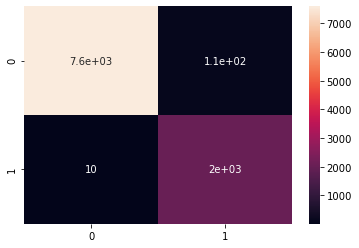

In [25]:
# Confusion Matrix. 110 Tanesinde 0 değerini 1 olarak tahmin etmiş. 10 Tanesinde 1 değerini 0 olarak tahmin etmiş.

cnfm = confusion_matrix(y_true=y2, y_pred=y_pred2)
sns.heatmap(cnfm, annot=True);

In [26]:
# Kapılar açıkkenki veriseti için Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_true=y2, y_pred=y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      7703
           1       0.95      1.00      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.97      0.99      0.98      9752
weighted avg       0.99      0.99      0.99      9752



In [27]:

gs_rec = metrics.recall_score(y2, y_pred2)

gs_f1 = metrics.f1_score(y2, y_pred2)

gs_prec = metrics.precision_score(y2, y_pred2)

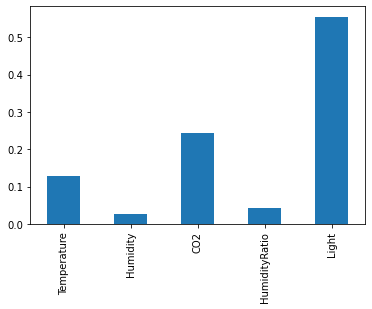

In [28]:
# Kullanılan her parametrenin model için önemini gösteren feature importance grafiği.

fi = pd.Series(data=grid_gb.best_estimator_.feature_importances_, index=features)
fi.plot.bar();

In [29]:

print("Light =",fi["Light"]);

#print("New Parameter =",fi["New_Parameter"]);

print("CO2 =",fi["CO2"])

print("Temperature=",fi["Temperature"])

Light = 0.5552990470824236
CO2 = 0.24468356413927947
Temperature= 0.12909507551506685


In [48]:
# Metrikleri tablo haline getirdik.
N=X2.shape[0]
train=X_train.shape[0]
test=X_test.shape[0]
Est=[['Logistic Regression',round(lg_accuracy,2),round(lg_rec,2),round(lg_f1,2),round(lg_prec,2) ,train ,test ,N],
     ['Gradient Boosting Classifier',round(accuracy_gb,2),round(gs_rec,2),round(gs_f1,2),round(gs_prec,2) ,train ,test ,N],]
df_acc=pd.DataFrame(Est)

In [49]:
df_acc.rename(columns={0:'Model' ,1:'Accuracy' ,2:'Recall' ,3:'f1 Score' ,4:'Precision',5:'Num-Train',6:'Num-Test',
                       7:'Total Samples'},inplace=True)

In [50]:
df_acc

,Model,Accuracy,Recall,f1 Score,Precision,Num-Train,Num-Test,Total Samples
0,Logistic Regression,0.99,1.0,0.98,0.97,8646,2162,9752
1,Gradient Boosting Classifier,0.99,1.0,0.97,0.95,8646,2162,9752


<AxesSubplot:xlabel='Model'>

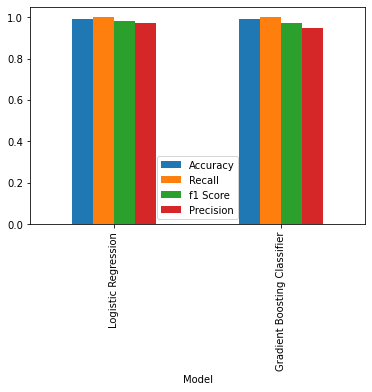

In [51]:
# Tablonun grafiğini çizdirdik.
df_acc.plot(kind='bar', x='Model',y = ['Accuracy','Recall','f1 Score','Precision'])